# 遗传算法（Genetic Algorithm）

# GA算法简介

遗传算法（`Genetic Algorithm`, GA）起源于对生物系统所进行的计算机模拟研究。它是模仿自然界生物进化机制发展起来的随机全局搜索和优化方法，借鉴了达尔文的进化论和孟德尔的遗传学说。其本质是一种高效、并行、全局搜索的方法，能在搜索过程中自动获取和积累有关搜索空间的知识，并自适应地控制搜索过程以求得最佳解。

遗传算法的有趣应用很多，诸如寻路问题，8数码问题，囚犯困境，动作控制，找圆心问题（在一个不规则的多边形中，寻找一个包含在该多边形内的最大圆圈的圆心），TSP问题，生产调度问题，人工生命模拟等。

## GA的使用

调用scikit-opt算法库现有的优化算法

### 例一

$$
求 \, f(x) = 0.5 + \frac{sin^2(x^2+y^2)-0.5}{1+0.001(x^2+y^2)} \, 的最小值 \\
其中\quad -1 \leq x,y \leq 1
$$
![image-20210207154615338](https://cdn.jsdelivr.net/gh/sheng962464/PicGo/img/image-20210207154615338.png)

定义函数方程式

In [1]:
import numpy as np


def schaffer(p):
    '''
    This function has plenty of local minimum, with strong shocks
    global minimum at (0,0) with value 0
    '''
    x1, x2 = p
    x = np.square(x1) + np.square(x2)
    return 0.5 + (np.square(np.sin(x)) - 0.5) / np.square(1 + 0.001 * x)

运行遗传算法

In [2]:
from sko.GA import GA

ga = GA(func=schaffer, n_dim=2, size_pop=50, max_iter=800, lb=[-1, -1], ub=[1, 1], precision=1e-7)
best_x, best_y = ga.run()
print('best_x:', best_x, '\n', 'best_y:', best_y)

best_x: [ 2.08616263e-07 -2.98023233e-08] 
 best_y: [0.]


使用 `matplotlib` 画图

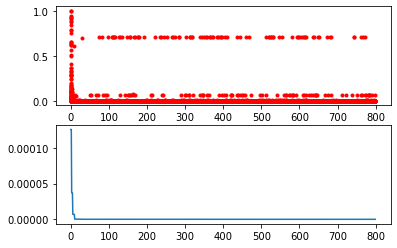

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

Y_history = pd.DataFrame(ga.all_history_Y)
fig, ax = plt.subplots(2, 1)
ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
Y_history.min(axis=1).cummin().plot(kind='line')
plt.show()

------

### 例二 旅行商问题
随机生成的矩阵点

In [9]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt

num_points = 50

points_coordinate = np.random.rand(num_points, 2)  # generate coordinate of points
distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')


def cal_total_distance(routine):
    '''The objective function. input routine, return total distance.
    cal_total_distance(np.arange(num_points))
    '''
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])

运行遗传算法

In [10]:
from sko.GA import GA_TSP

ga_tsp = GA_TSP(func=cal_total_distance, n_dim=num_points, size_pop=50, max_iter=500, prob_mut=1)
best_points, best_distance = ga_tsp.run()

使用 `matplotlib` 画图

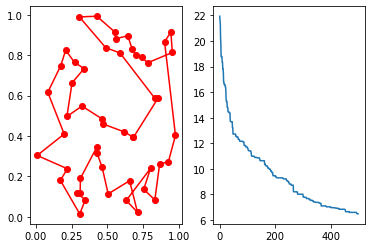

In [11]:
fig, ax = plt.subplots(1, 2)
best_points_ = np.concatenate([best_points, [best_points[0]]])
best_points_coordinate = points_coordinate[best_points_, :]
ax[0].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], 'o-r')
ax[1].plot(ga_tsp.generation_best_Y)
plt.show()